# 🍽️ A Data Tale: Unlocking Restaurant Secrets with Hypothesis Testing

Welcome to **The Data Diner**! 🍷🍝

Imagine you are a data scientist hired by a busy restaurant manager, **Mr. Gusteau**. He has a treasure trove of data about his customers—bills, tips, smoking habits, and more. But he doesn't know what to make of it.

He has questions. You have the tools.

Today, we will use **Hypothesis Testing** to answer Mr. Gusteau's burning questions. We won't just look at numbers; we'll tell the story hidden within them.

### 🧰 The Toolkit
First, let's open our toolbox and load the data.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Loading the 'tips' dataset
dataset = sns.load_dataset('tips')

# Let's take a peek at the first few guests
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
# Creating a Contingency Table (The Observed Values)
dataset_table = pd.crosstab(dataset['sex'], dataset['smoker'])
print("👀 Observed Values (What we actually saw):")
print(dataset_table)

👀 Observed Values (What we actually saw):
smoker  Yes  No
sex            
Male     60  97
Female   33  54


### 🧮 The Math Behind the Curtain

The Chi-Square test compares what we **observed** (the table above) with what we would **expect** if there was absolutely no relationship between gender and smoking.

We can calculate the expected values and the Chi-Square statistic manually to understand what's happening under the hood.

In [3]:
# Observed Values
Observed_Values = dataset_table.values
print("Observed Values :-\n", Observed_Values)

# Using scipy to get the Chi-Square statistic and Expected Values
val = stats.chi2_contingency(dataset_table)
Expected_Values = val[3]

print("\n🔮 Expected Values (If there was no relationship):\n", Expected_Values)

Observed Values :-
 [[60 97]
 [33 54]]

🔮 Expected Values (If there was no relationship):
 [[59.84016393 97.15983607]
 [33.15983607 53.84016393]]


In [4]:
# Calculating Degrees of Freedom
no_of_rows = len(dataset_table.iloc[0:2, 0])
no_of_columns = len(dataset_table.iloc[0, 0:2])
ddof = (no_of_rows - 1) * (no_of_columns - 1)
print("Degree of Freedom:", ddof)
alpha = 0.05

# Calculating Chi-Square Statistic Manually
chi_square = sum([(o - e)**2. / e for o, e in zip(Observed_Values, Expected_Values)])
chi_square_statistic = chi_square[0] + chi_square[1]

print("chi-square statistic:-", chi_square_statistic)

# Calculating Critical Value
critical_value = stats.chi2.ppf(q=1-alpha, df=ddof)
print('critical_value:', critical_value)

# Calculating P-Value
p_value = 1 - stats.chi2.cdf(x=chi_square_statistic, df=ddof)
print('p-value:', p_value)

Degree of Freedom: 1
chi-square statistic:- 0.001934818536627623
critical_value: 3.8414588206941205
p-value: 0.964915107315732


### ⚖️ The Verdict

Now, let's interpret our findings using both the Critical Value and the P-Value.

In [5]:
print("--- Using Critical Value ---")
if chi_square_statistic >= critical_value:
    print("Reject H0: There is a relationship between Gender and Smoking.")
else:
    print("Retain H0: There is NO relationship between Gender and Smoking.")

print("\n--- Using P-Value ---")
if p_value <= alpha:
    print("Reject H0: There is a relationship between Gender and Smoking.")
else:
    print("Retain H0: There is NO relationship between Gender and Smoking.")

--- Using Critical Value ---
Retain H0: There is NO relationship between Gender and Smoking.

--- Using P-Value ---
Retain H0: There is NO relationship between Gender and Smoking.


---
## 💵 Chapter 2: The Battle of the Bills (T-Test)

Mr. Gusteau turns his attention to the cash register. He wants to know about the money.

The **T-Test** helps us compare the **means** (averages) of groups to see if they are significantly different.

### Part A: The "Average Tip" Hunch (One-Sample T-Test)

Mr. Gusteau has a gut feeling:
> *"I bet the average tip in this restaurant is exactly $3.00."*

Is he right? Or is the average tip significantly different from $3.00?

**The Hypothesis:**
*   **$H_0$:** The average tip is **$3.00**.
*   **$H_1$:** The average tip is **not $3.00**.

In [6]:
# One Sample T-Test
tips_data = dataset['tip']
hypothesized_mean = 3.0

t_stat, p_val = stats.ttest_1samp(tips_data, hypothesized_mean)

print(f"💰 Actual Average Tip: ${np.mean(tips_data):.2f}")
print(f"📉 P-value: {p_val}")

if p_val < 0.05:
    print("\n🚨 CONCLUSION: Reject H0! The average tip is significantly different from $3.00.")
else:
    print("\n✅ CONCLUSION: Retain H0! The average tip is not significantly different from $3.00.")

💰 Actual Average Tip: $3.00
📉 P-value: 0.9845119176410543

✅ CONCLUSION: Retain H0! The average tip is not significantly different from $3.00.


### Part B: Smokers vs Non-Smokers (Two-Sample T-Test)

A debate breaks out in the kitchen. One waiter claims:
> *"Smokers are more generous! They tip more than non-smokers!"*

Another waiter disagrees. Who is right?

**The Hypothesis:**
*   **$H_0$:** No difference in average tips between smokers and non-smokers.
*   **$H_1$:** There is a difference.

In [7]:
smoker_tips = dataset[dataset['smoker'] == 'Yes']['tip']
nonsmoker_tips = dataset[dataset['smoker'] == 'No']['tip']

print(f"🚬 Average Smoker Tip: ${np.mean(smoker_tips):.2f}")
print(f"🚭 Average Non-Smoker Tip: ${np.mean(nonsmoker_tips):.2f}")

t_stat, p_val = stats.ttest_ind(smoker_tips, nonsmoker_tips)

print(f"📉 P-value: {p_val}")

if p_val < 0.05:
    print("\n🚨 CONCLUSION: Reject H0! There is a significant difference.")
else:
    print("\n✅ CONCLUSION: Retain H0! No significant difference found.")

🚬 Average Smoker Tip: $3.01
🚭 Average Non-Smoker Tip: $2.99
📉 P-value: 0.9265931522244977

✅ CONCLUSION: Retain H0! No significant difference found.


---
## 📅 Chapter 3: The Day of the Week Debate (ANOVA)

Mr. Gusteau notices that the restaurant feels different on different days. He asks:

> *"Do people tip differently on Thursday, Friday, Saturday, and Sunday? Or is it all the same?"*

Since we are comparing **more than two groups**, we can't use a simple T-Test. We need **ANOVA (Analysis of Variance)**.

**The Hypothesis:**
*   **$H_0$:** The average tip is the **same** across all days.
*   **$H_1$:** At least one day has a **different** average tip.

In [8]:
# Preparing the data for ANOVA
tips_thur = dataset[dataset['day'] == 'Thur']['tip']
tips_fri = dataset[dataset['day'] == 'Fri']['tip']
tips_sat = dataset[dataset['day'] == 'Sat']['tip']
tips_sun = dataset[dataset['day'] == 'Sun']['tip']

# Running One-Way ANOVA
f_stat, p_val = stats.f_oneway(tips_thur, tips_fri, tips_sat, tips_sun)

print(f"📉 P-value: {p_val}")

if p_val < 0.05:
    print("\n🚨 CONCLUSION: Reject H0! Tips vary significantly by day.")
else:
    print("\n✅ CONCLUSION: Retain H0! No significant difference in tips across days.")

📉 P-value: 0.1735885553040583

✅ CONCLUSION: Retain H0! No significant difference in tips across days.


---
## 🔗 Chapter 4: The Bill-Tip Connection (Correlation)

Finally, Mr. Gusteau asks the most fundamental question:

> *"If the bill is higher, does the tip go up?"*

We expect the answer to be yes, but let's prove it with **Correlation**.

**The Hypothesis:**
*   **$H_0$:** There is **no correlation** between Total Bill and Tip.
*   **$H_1$:** There is a **correlation**.

🔗 Correlation Coefficient: 0.68
📉 P-value: 6.692470646863359e-34


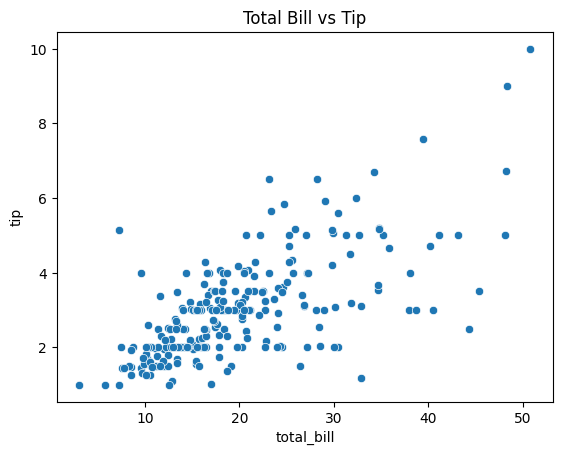


🚨 CONCLUSION: Reject H0! There is a significant correlation. Higher bills mean higher tips!


In [9]:
# Calculating Pearson Correlation
corr, p_val = stats.pearsonr(dataset['total_bill'], dataset['tip'])

print(f"🔗 Correlation Coefficient: {corr:.2f}")
print(f"📉 P-value: {p_val}")

sns.scatterplot(x='total_bill', y='tip', data=dataset)
plt.title('Total Bill vs Tip')
plt.show()

if p_val < 0.05:
    print("\n🚨 CONCLUSION: Reject H0! There is a significant correlation. Higher bills mean higher tips!")
else:
    print("\n✅ CONCLUSION: Retain H0! No significant correlation found.")

## 🏁 Final Thoughts

We have traversed the landscape of The Data Diner, using statistics to uncover the truth:

1.  **Chi-Square**: Gender and Smoking are likely independent.
2.  **T-Tests**: 
    *   The average tip is roughly $3.00.
    *   Smokers and Non-Smokers tip similarly.
3.  **ANOVA**: The day of the week doesn't significantly change the tipping behavior.
4.  **Correlation**: As expected, bigger bills lead to bigger tips!

Mr. Gusteau is now a data-driven manager. Bon Appétit! 🍷